In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import scipy.stats as stats
from sklearn import metrics
from sklearn.model_selection import train_test_split
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import metrics
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import joblib


In [2]:
df = pd.read_csv("Sikkim-1.csv")


In [3]:
df

,Unnamed: 0,T2M,PRECTOTCORR,DY,MO,YEAR,RH2M,WD50M,WS2M
0,0,-4.31,0.0,1,1,2011,83.50,265.25,2.48
1,1,-4.80,1.0,2,1,2011,63.19,193.19,1.59
2,2,-1.76,1.0,3,1,2011,52.69,295.38,1.20
3,3,-1.45,1.0,4,1,2011,54.44,214.25,1.34
4,4,-1.34,1.0,5,1,2011,57.75,264.38,1.40
...,...,...,...,...,...,...,...,...,...
3738,3738,3.90,1.0,27,3,2021,48.12,203.56,1.50
3739,3739,2.99,1.0,28,3,2021,56.12,248.69,1.70
3740,3740,2.80,0.0,29,3,2021,60.56,261.56,1.66
3741,3741,2.26,0.0,30,3,2021,77.62,260.12,2.17


In [4]:
d=df.drop(['Unnamed: 0'],axis=1)

In [5]:
df=d.copy()

In [6]:
X = df.drop(["PRECTOTCORR", "DY","MO","YEAR","RH2M","WS2M",'WD50M'], axis=1)
Y = df["PRECTOTCORR"]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size =0.2, stratify = Y, random_state = 0)

In [8]:
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info


array([0.22104868])

In [9]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)


T2M    0.221049
dtype: float64

<AxesSubplot:>

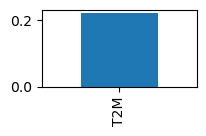

In [10]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(2, 1))


In [11]:
sm = SMOTE(random_state=0)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_res)))


The number of classes before fit Counter({0.0: 2005, 1.0: 989})
The number of classes after fit Counter({0.0: 2005, 1.0: 2005})


In [12]:
logreg = LogisticRegression()
logreg.fit(X_train_res, y_train_res)


LogisticRegression()

In [13]:
y_pred2 = logreg.predict(X_test)
print(confusion_matrix(y_test,y_pred2))
print(accuracy_score(y_test,y_pred2))
print(classification_report(y_test,y_pred2))

[[385 117]
 [ 55 192]]
0.7703604806408545
              precision    recall  f1-score   support

         0.0       0.88      0.77      0.82       502
         1.0       0.62      0.78      0.69       247

    accuracy                           0.77       749
   macro avg       0.75      0.77      0.75       749
weighted avg       0.79      0.77      0.78       749



/home/unknown/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


0.7721301030695034

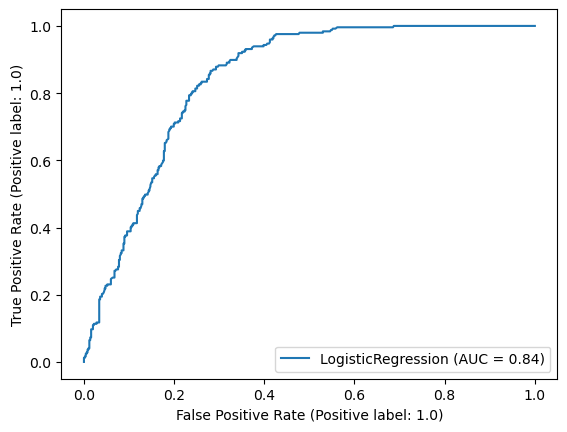

In [14]:
metrics.plot_roc_curve(logreg, X_test, y_test)
metrics.roc_auc_score(y_test, y_pred2, average=None)


In [15]:
gnb = GaussianNB()
gnb.fit(X_train_res, y_train_res)


GaussianNB()

In [16]:
y_pred3 = gnb.predict(X_test)
print(confusion_matrix(y_test,y_pred3))
print(accuracy_score(y_test,y_pred3))
print(classification_report(y_test,y_pred3))

[[378 124]
 [ 48 199]]
0.7703604806408545
              precision    recall  f1-score   support

         0.0       0.89      0.75      0.81       502
         1.0       0.62      0.81      0.70       247

    accuracy                           0.77       749
   macro avg       0.75      0.78      0.76       749
weighted avg       0.80      0.77      0.78       749



/home/unknown/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


0.7793280320015484

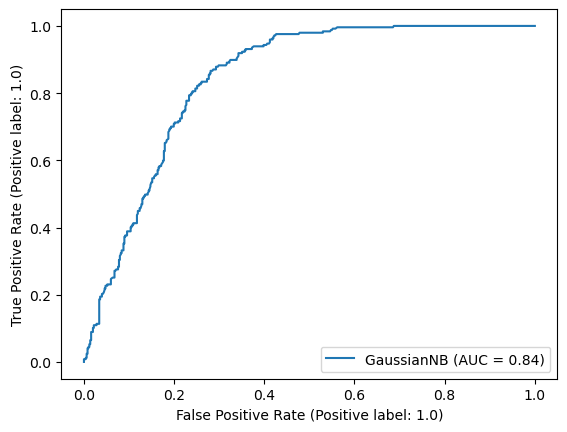

In [17]:
metrics.plot_roc_curve(gnb, X_test, y_test)
metrics.roc_auc_score(y_test, y_pred3, average=None)


In [18]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_res, y_train_res)


KNeighborsClassifier(n_neighbors=3)

In [19]:
y_pred4 = knn.predict(X_test)
print(confusion_matrix(y_test,y_pred4))
print(accuracy_score(y_test,y_pred4))
print(classification_report(y_test,y_pred4))

[[384 118]
 [ 81 166]]
0.7343124165554072
              precision    recall  f1-score   support

         0.0       0.83      0.76      0.79       502
         1.0       0.58      0.67      0.63       247

    accuracy                           0.73       749
   macro avg       0.71      0.72      0.71       749
weighted avg       0.75      0.73      0.74       749



/home/unknown/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [20]:
from sklearn.metrics import RocCurveDisplay

/home/unknown/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


0.71850250818588

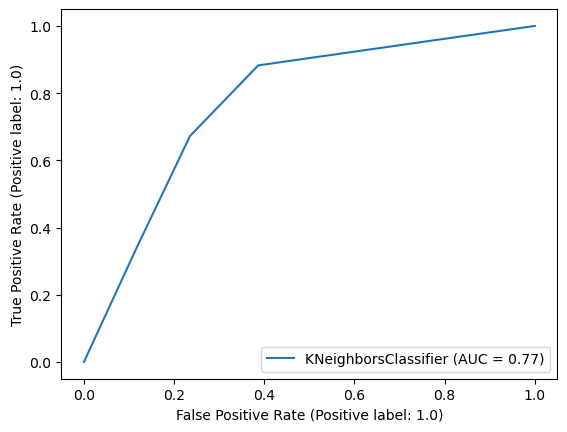

In [21]:
metrics.plot_roc_curve(knn, X_test, y_test)
metrics.roc_auc_score(y_test, y_pred4, average=None)


In [22]:
svc = SVC()


In [23]:
svc.fit(X_train_res, y_train_res)


SVC()

In [24]:
y_pred5 = svc.predict(X_test)
print(confusion_matrix(y_test,y_pred5))
print(accuracy_score(y_test,y_pred5))
print(classification_report(y_test,y_pred5))

[[342 160]
 [ 27 220]]
0.7503337783711616
              precision    recall  f1-score   support

         0.0       0.93      0.68      0.79       502
         1.0       0.58      0.89      0.70       247

    accuracy                           0.75       749
   macro avg       0.75      0.79      0.74       749
weighted avg       0.81      0.75      0.76       749



/home/unknown/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


0.7859815797538591

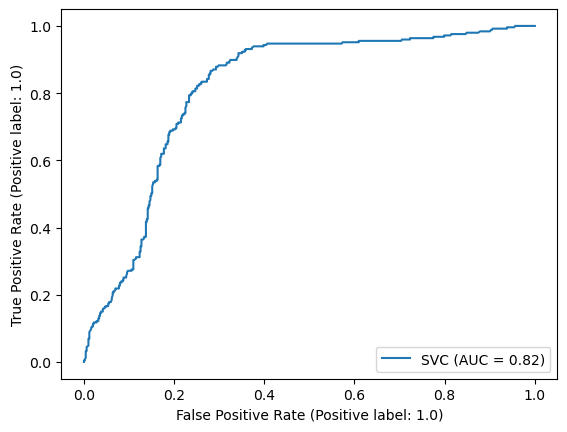

In [25]:
metrics.plot_roc_curve(svc, X_test, y_test)
metrics.roc_auc_score(y_test, y_pred5, average=None)


In [26]:
# create model instance
bst = XGBClassifier(n_estimators=2, max_depth=2, learning_rate=1, objective='binary:logistic')
# fit model
bst.fit(X_train, y_train)
# make predictions
y_pred6 = bst.predict(X_test)

In [27]:
# y_pred6 = xgb.predict(X_test)
print(confusion_matrix(y_test,y_pred6))
print(accuracy_score(y_test,y_pred6))
print(classification_report(y_test,y_pred6))

[[365 137]
 [ 42 205]]
0.7610146862483311
              precision    recall  f1-score   support

         0.0       0.90      0.73      0.80       502
         1.0       0.60      0.83      0.70       247

    accuracy                           0.76       749
   macro avg       0.75      0.78      0.75       749
weighted avg       0.80      0.76      0.77       749



In [28]:
rf=RandomForestClassifier()
rf.fit(X_train_res,y_train_res)

RandomForestClassifier()

In [29]:
y_pred1 = rf.predict(X_test)
print(confusion_matrix(y_test,y_pred1))
print(accuracy_score(y_test,y_pred1))
print(classification_report(y_test,y_pred1))

[[387 115]
 [104 143]]
0.7076101468624834
              precision    recall  f1-score   support

         0.0       0.79      0.77      0.78       502
         1.0       0.55      0.58      0.57       247

    accuracy                           0.71       749
   macro avg       0.67      0.67      0.67       749
weighted avg       0.71      0.71      0.71       749



/home/unknown/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


0.6749318515412035

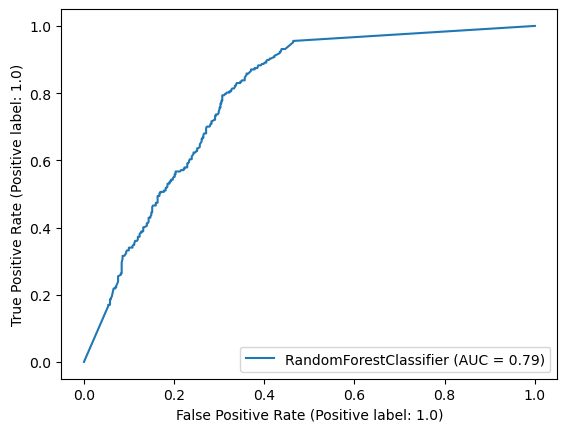

In [30]:
metrics.plot_roc_curve(rf, X_test, y_test)
metrics.roc_auc_score(y_test, y_pred1, average=None)


In [31]:
cat = CatBoostClassifier(iterations=2000, eval_metric="AUC")
cat.fit(X_train_res, y_train_res)


Learning rate set to 0.009873
0:	total: 48.8ms	remaining: 1m 37s
1:	total: 49.9ms	remaining: 49.9s
2:	total: 51.1ms	remaining: 34s
3:	total: 52.1ms	remaining: 26s
4:	total: 53.1ms	remaining: 21.2s
5:	total: 54.1ms	remaining: 18s
6:	total: 55.1ms	remaining: 15.7s
7:	total: 56.1ms	remaining: 14s
8:	total: 57.1ms	remaining: 12.6s
9:	total: 58.1ms	remaining: 11.6s
10:	total: 59ms	remaining: 10.7s
11:	total: 60ms	remaining: 9.94s
12:	total: 61ms	remaining: 9.32s
13:	total: 62ms	remaining: 8.79s
14:	total: 63ms	remaining: 8.34s
15:	total: 64ms	remaining: 7.94s
16:	total: 65ms	remaining: 7.58s
17:	total: 66.1ms	remaining: 7.27s
18:	total: 67.1ms	remaining: 6.99s
19:	total: 68.2ms	remaining: 6.75s
20:	total: 69.2ms	remaining: 6.52s
21:	total: 70.2ms	remaining: 6.31s
22:	total: 71.2ms	remaining: 6.12s
23:	total: 72.1ms	remaining: 5.94s
24:	total: 73.1ms	remaining: 5.77s
25:	total: 74.1ms	remaining: 5.62s
26:	total: 75.1ms	remaining: 5.49s
27:	total: 76.1ms	remaining: 5.36s
28:	total: 77.1ms	rem

In [32]:
y_pred = cat.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[353 149]
 [ 38 209]]
0.7503337783711616
              precision    recall  f1-score   support

         0.0       0.90      0.70      0.79       502
         1.0       0.58      0.85      0.69       247

    accuracy                           0.75       749
   macro avg       0.74      0.77      0.74       749
weighted avg       0.80      0.75      0.76       749



/home/unknown/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


0.7746705485749311

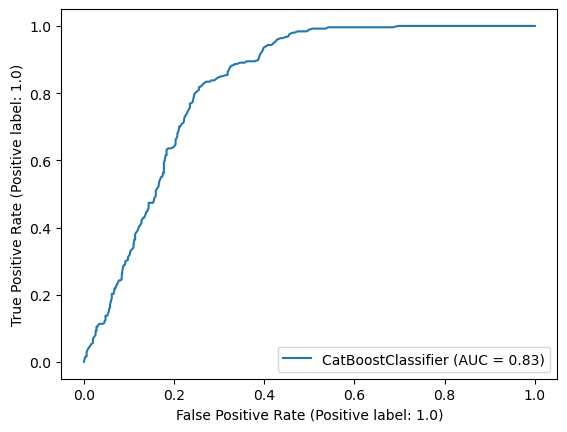

In [33]:
from sklearn import metrics
metrics.plot_roc_curve(cat, X_test, y_test)
metrics.roc_auc_score(y_test, y_pred, average=None) 

In [34]:
joblib.dump(rf, "rf.pkl")
joblib.dump(logreg, "logreg.pkl")
joblib.dump(gnb, "gnb.pkl")
joblib.dump(knn, "knn.pkl")
joblib.dump(svc, "svc.pkl")
joblib.dump(bst, "xgb.pkl")
joblib.dump(svc, "cat.pkl")

['cat.pkl']